<a href="https://colab.research.google.com/github/yoonsongg/CP1/blob/main/CP_1_copyof_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 10.9 MB/s 
     |████████████████████████████████| 97 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 47.7 MB/s 
     |████████████████████████████████| 180 kB 19.2 MB/s 
     |████████████████████████████████| 63 kB 377 kB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=493f110a53fbc05c8997ab40aed2377e341d025b212264c52347d000ead713be
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=fb54d3496872249918e748c55b75ae15b58a33ba3d82a3587bed476db008302e
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [3]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:

import pandas as pd

correct_train_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_correct_train.csv'
itemIRT_train_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_itemIRT_train.csv'
learnerIRT_train_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_learnerIRT_train.csv'

correct_valid_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_correct_valid.csv'
itemIRT_valid_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_itemIRT_valid.csv'
learnerIRT_valid_url = '/content/drive/MyDrive/AI_Bootcamp/CP1/grade7_learnerIRT_valid.csv'


correct_train = pd.read_csv(correct_train_url)
itemIRT_train = pd.read_csv(itemIRT_train_url)
learnerIRT_train = pd.read_csv(learnerIRT_train_url)

correct_valid = pd.read_csv(correct_valid_url)
itemIRT_valid = pd.read_csv(itemIRT_valid_url)
learnerIRT_valid = pd.read_csv(learnerIRT_valid_url)


In [5]:
correct_train.head()

,learnerID,testID,assessmentItemID,answerCode,Timestamp
0,A070001903,A070000094,A070094008,1,2020-08-22 08:19:15
1,A070001440,A070000094,A070094006,1,2020-09-14 03:04:07
2,A070001619,A070000094,A070094007,0,2020-09-16 21:30:37
3,A070001032,A070000094,A070094004,0,2020-12-16 04:31:25
4,A070001138,A070000094,A070094001,1,2020-08-08 19:34:14


In [6]:
len(correct_train), len(itemIRT_train), len(learnerIRT_train)

(210550, 1322, 26081)

In [7]:
len(correct_valid), len(itemIRT_valid), len(learnerIRT_valid)

(43044, 1322, 5333)

In [5]:
correct_train['Timestamp'] = pd.to_datetime(correct_train['Timestamp'], utc = False)
correct_valid['Timestamp'] = pd.to_datetime(correct_valid['Timestamp'], utc = False)

In [9]:
correct_train['Timestamp'].dtypes

dtype('<M8[ns]')

In [12]:
correct_valid.head()

,learnerID,testID,assessmentItemID,answerCode,Timestamp
0,A070000441,A070000094,A070094007,0,2020-09-21 19:11:27
1,A070001547,A070000094,A070094004,0,2020-09-09 02:44:19
2,A070001444,A070000094,A070094002,0,2020-09-09 03:05:35
3,A070001500,A070000094,A070094003,1,2020-09-17 17:01:49
4,A070001672,A070000094,A070094005,1,2020-08-19 06:06:43


In [13]:
correct_valid.sort_values(by = ['Timestamp']).groupby('learnerID').head()

,learnerID,testID,assessmentItemID,answerCode,Timestamp
18425,A070000138,A070000029,A070029001,0,2020-01-03 00:48:15
18499,A070000138,A070000029,A070029002,1,2020-01-03 00:48:34
18422,A070000138,A070000029,A070029003,0,2020-01-03 00:48:42
18859,A070000138,A070000029,A070029004,0,2020-01-03 00:48:44
19168,A070000138,A070000029,A070029005,0,2020-01-03 00:48:50
...,...,...,...,...,...
14075,A070001168,A070000153,A070153001,0,2020-12-29 05:25:07
14914,A070001168,A070000153,A070153002,0,2020-12-29 05:25:09
14938,A070001168,A070000153,A070153003,0,2020-12-29 05:25:11
14705,A070001168,A070000153,A070153004,0,2020-12-29 05:25:14


In [11]:
correct_train.sort_values(by = ['Timestamp']).groupby('learnerID').describe()

answerCode                                             
                count      mean       std  min  25%  50%  75%  max
learnerID                                                         
A070000001      415.0  0.551807  0.497909  0.0  0.0  1.0  1.0  1.0
A070000002       84.0  0.214286  0.412790  0.0  0.0  0.0  0.0  1.0
A070000003      557.0  0.849192  0.358183  0.0  1.0  1.0  1.0  1.0
A070000004      183.0  0.278689  0.449584  0.0  0.0  0.0  1.0  1.0
A070000005      657.0  0.298326  0.457872  0.0  0.0  0.0  1.0  1.0
...               ...       ...       ...  ...  ...  ...  ...  ...
A070002062        8.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
A070002063       16.0  0.562500  0.512348  0.0  0.0  1.0  1.0  1.0
A070002066       24.0  0.166667  0.380693  0.0  0.0  0.0  0.0  1.0
A070002067        8.0  0.500000  0.534522  0.0  0.0  0.5  1.0  1.0
A070002068       16.0  0.437500  0.512348  0.0  0.0  0.0  1.0  1.0

[1379 rows x 8 columns]

210550

In [ ]:
correct_train.describe()

In [ ]:
itemIRT_train.describe()

In [ ]:
learnerIRT_train.describe()

In [ ]:
correct_train.head()

In [ ]:
itemIRT_train.head()

In [ ]:
learnerIRT_train.head()

In [5]:
second_df = pd.merge(left = correct_train, right = itemIRT_train, how = 'left', on = ['testID', 'assessmentItemID'])

In [ ]:
second_df.head()

,learnerID,testID,assessmentItemID,answerCode,difficultyLevel,discriminationLevel,guessLevel
0,A070001903,A070000094,A070094008,1,-0.629810,2.806422,0.046112
1,A070001311,A070000094,A070094005,1,-0.152352,4.111677,0.146713
2,A070001788,A070000094,A070094001,0,0.785138,8.954192,0.295473
3,A070000421,A070000094,A070094008,1,-0.629810,2.806422,0.046112
4,A070001017,A070000094,A070094002,1,-0.335048,5.953758,0.278443


In [ ]:
len(second_df)

210550

In [6]:
train_df = pd.merge(left = second_df, right = learnerIRT_train, how = 'left', on = ['testID', 'learnerID'])

In [8]:
train_df.head()

,learnerID,testID,assessmentItemID,answerCode,Timestamp_x,difficultyLevel,discriminationLevel,guessLevel,KnowledgeTag,Timestamp_y,learnerProfile,theta,realScore,Timestamp
0,A070001903,A070000094,A070094008,1,2020-08-22 08:19:15,-0.629810,2.806422,0.046112,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.173620,0.635192,2021-01-08 06:08:25.336946
1,A070001440,A070000094,A070094006,1,2020-09-14 03:04:07,0.001141,1.060096,0.046260,NaN,2021-01-08 06:08:25.336946,F;S01;7,1.293742,0.964566,2021-01-08 06:08:25.336946
2,A070001619,A070000094,A070094007,0,2020-09-16 21:30:37,1.139958,13.727655,0.299840,NaN,2021-01-08 06:08:25.336946,M;S01;7,0.864086,0.847392,2021-01-08 06:08:25.336946
3,A070001032,A070000094,A070094004,0,2020-12-16 04:31:25,-0.869407,3.337444,0.013006,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.791087,0.347025,2021-01-08 06:08:25.336946
4,A070001138,A070000094,A070094001,1,2020-08-08 19:34:14,0.785138,8.954192,0.295473,NaN,2021-01-08 06:08:25.336946,F;S01;7,1.233376,0.952915,2021-01-08 06:08:25.336946


In [9]:
len(train_df)

210550

In [7]:
se_df = pd.merge(left = correct_valid, right = itemIRT_valid, how = 'left', on = ['testID', 'assessmentItemID'])
valid_df = pd.merge(left = se_df, right = learnerIRT_valid, how = 'left', on = ['testID', 'learnerID'])

In [11]:
len(valid_df)

43044

In [ ]:
#train_df.to_csv('train', index = False)
#valid_df.to_csv('valid', index = False)

# 모델만들기1

### 로지스틱회귀

*train_df(answerCode | difficultyLevel | discriminationLevel | 	guessLevel | theta | realScore)


*valid_df 


In [16]:
target = 'answerCode'
#features = ['difficultyLevel', 'guessLevel', 'theta', 'realScore']
features = ['difficultyLevel', 'discriminationLevel', 'guessLevel', 'theta', 'realScore']
y_train = train_df[target]
X_train = train_df[features]

y_train.value_counts(normalize = True)

1    0.519212
0    0.480788
Name: answerCode, dtype: float64

In [17]:
y_val = valid_df[target]
X_val = valid_df[features]

In [18]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [19]:
print('검증세트 정확도', logistic.score(X_val, y_val))

검증세트 정확도 0.809938667410092


In [20]:

from wandb.keras import WandbCallback
wandb_project = 'project_logisticRegression'
wandb_group = ""
wandb.init(project = wandb_project)

from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
coefficients = pd.Series(model.coef_[0], X_train.columns)
wandb.log({'accuracy' : accuracy})


wandb: Currently logged in as: iznooy (use `wandb login --relogin` to force relogin)


In [28]:
()
coefficients


difficultyLevel       -1.620651
discriminationLevel   -0.001726
guessLevel             3.227950
theta                  1.742168
realScore              1.590439
dtype: float64

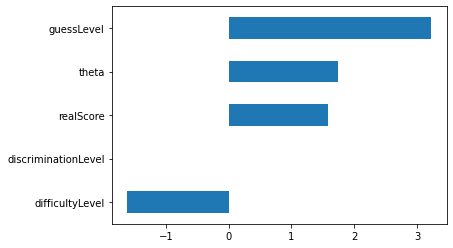

In [29]:
coefficients.sort_values().plot.barh()

In [ ]:
test_case = [[2, 0, 2, -1, 1]]
logistic.predict(test_case)

array([1])

In [ ]:
test_case_1 = [[-1, 0, 2, -1, 1]]
logistic.predict(test_case_1)

array([1])

In [ ]:
test_case_2 = [[3, 0, 2, -1, -1]]
logistic.predict(test_case_2)

array([0])

In [ ]:
import pickle
from sklearn.externals import joblib

saved_model = pickle.dumps(clf)
clf_from_pickle = pickle.loads(saved_model)

# joblib.dump(clf, 'filename.pkl') 
# clf_from_joblib = joblib.load('filename.pkl') 
# clf_from_joblib.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

In [ ]:
!pip install joblib

In [ ]:
import pickle
from sklearn.externals import joblib

joblib.dump(logistic, 'filename.pkl') 
clf_from_joblib = joblib.load('filename.pkl') 
clf_from_joblib.predict(test_case)

#모델 만들기2

###Rnn



In [26]:
layer_input = keras.Input(shape = (5,1), name = 'input')
layer_rnn = keras.layers.SimpleRNN(100, name = 'RNN')(layer_input)
layer_output = keras.layers.Dense(1, name = 'output')(layer_rnn)

rnn_model = keras.Model(layer_input, layer_output)
print(rnn_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 1)]            0         
                                                                 
 RNN (SimpleRNN)             (None, 100)               10200     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
rnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
rnn_model._name = 'many_to_one'

In [28]:
from wandb.keras import WandbCallback
wandb_project = 'project_RNN'
wandb_group = ""
wandb.init(project = wandb_project)

wandb.config.epochs = 20
wandb.config.batch_size = 128

rnn_model.fit(X_train, y_train,
          batch_size=wandb.config.batch_size, 
          epochs=wandb.config.epochs, 
         validation_split=0.2, callbacks = [WandbCallback()])


accuracy,█▃▁▄▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
batch_size,▁
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epochs,▁
loss,▁▆█▅▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
val_accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁██▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
accuracy,0.52286
batch_size,128
best_epoch,0
best_val_loss,6.39705


Epoch 1/20
1316/1316 [==============================] - 7s 5ms/step - loss: 0.5796 - accuracy: 0.7539 - val_loss: 0.4625 - val_accuracy: 0.7829
Epoch 2/20
1316/1316 [==============================] - 6s 5ms/step - loss: 3.0967 - accuracy: 0.6703 - val_loss: 7.6385 - val_accuracy: 0.5043
Epoch 3/20
1316/1316 [==============================] - 6s 5ms/step - loss: 7.9329 - accuracy: 0.4851 - val_loss: 7.5775 - val_accuracy: 0.5082
Epoch 4/20
1316/1316 [==============================] - 6s 5ms/step - loss: 7.7568 - accuracy: 0.4966 - val_loss: 7.1534 - val_accuracy: 0.5360
Epoch 5/20
1316/1316 [==============================] - 6s 5ms/step - loss: 7.2154 - accuracy: 0.5313 - val_loss: 7.1176 - val_accuracy: 0.5370
Epoch 6/20
1316/1316 [==============================] - 6s 5ms/step - loss: 6.6999 - accuracy: 0.5634 - val_loss: 6.5143 - val_accuracy: 0.5765
Epoch 7/20
1316/1316 [==============================] - 6s 5ms/step - loss: 6.5311 - accuracy: 0.5752 - val_loss: 6.5143 - val_accuracy:

In [29]:
print('검증세트 정확도', rnn_model.evaluate(X_val, y_val))

1346/1346 [==============================] - 2s 2ms/step - loss: 6.8689 - accuracy: 0.5537
검증세트 정확도 [6.868892192840576, 0.5536892414093018]


### Stacked RNN

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [23]:
layer_input = keras.Input(shape = (5,1), name= 'input')
layer_rnn0 = keras.layers.SimpleRNN(100, return_sequences=True, name = 'RNN_cell_0')(layer_input)
layer_rnn1 = keras.layers.SimpleRNN(100, name = 'RNN_cell_1')(layer_rnn0)
layer_output = keras.layers.Dense(1, name = 'output')(layer_rnn1)

model = keras.Model(layer_input, layer_output)
model._name = 'stack_many_to_one'
print(model.summary())

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "stack_many_to_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 1)]            0         
                                                                 
 RNN_cell_0 (SimpleRNN)      (None, 5, 100)            10200     
                                                                 
 RNN_cell_1 (SimpleRNN)      (None, 100)               20100     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
from wandb.keras import WandbCallback
wandb_project = 'project_stackedRNN'
wandb_group = ""
wandb.init(project = wandb_project)

wandb.config.epochs = 20
wandb.config.batch_size = 128


model.fit(X_train, y_train,
          batch_size=wandb.config.batch_size, 
          epochs=wandb.config.epochs, 
         validation_split=0.2, callbacks = [WandbCallback()])

'''
model.fit(X_train, y_train,
          batch_size= 10, 
          epochs=128, 
         validation_split=0.2, callbacks = [early_stop, save_best])
'''

wandb.log({'epochs' : wandb.config.epochs,
           'batch_size' : wandb.config.batch_size})

accuracy,▁
accuracy,0.80994


Epoch 1/20
1316/1316 [==============================] - 17s 12ms/step - loss: 7.0029 - accuracy: 0.5310 - val_loss: 6.3970 - val_accuracy: 0.5655
Epoch 2/20
1316/1316 [==============================] - 11s 9ms/step - loss: 7.7925 - accuracy: 0.4889 - val_loss: 7.7095 - val_accuracy: 0.4980
Epoch 3/20
1316/1316 [==============================] - 11s 9ms/step - loss: 8.0168 - accuracy: 0.4770 - val_loss: 7.7209 - val_accuracy: 0.4995
Epoch 4/20
1316/1316 [==============================] - 11s 9ms/step - loss: 7.6161 - accuracy: 0.5015 - val_loss: 7.6163 - val_accuracy: 0.5005
Epoch 5/20
1316/1316 [==============================] - 11s 9ms/step - loss: 7.2762 - accuracy: 0.5229 - val_loss: 7.6163 - val_accuracy: 0.5005
Epoch 6/20
1316/1316 [==============================] - 11s 9ms/step - loss: 7.2762 - accuracy: 0.5229 - val_loss: 7.6163 - val_accuracy: 0.5005
Epoch 7/20
1316/1316 [==============================] - 11s 9ms/step - loss: 7.2762 - accuracy: 0.5229 - val_loss: 7.6163 - val_a

In [25]:
print('검증세트 정확도', model.evaluate(X_val, y_val))

1346/1346 [==============================] - 3s 2ms/step - loss: 7.0828 - accuracy: 0.5355
검증세트 정확도 [7.082770824432373, 0.5355450510978699]


# LSTM


In [31]:
train_df.shape

(210550, 14)

In [18]:
train_df.sort_values(by = 'Timestamp_x').groupby('learnerID').head()

,learnerID,testID,assessmentItemID,answerCode,Timestamp_x,difficultyLevel,discriminationLevel,guessLevel,KnowledgeTag,Timestamp_y,learnerProfile,theta,realScore,Timestamp
75841,A070000372,A070000019,A070019001,1,2020-01-01 00:32:43,-0.267794,2.179342,3.048870e-05,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.008597,0.448231,2021-01-08 06:08:25.336946
74659,A070000372,A070000019,A070019002,0,2020-01-01 00:32:46,0.627104,1.917141,2.999971e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.008597,0.448231,2021-01-08 06:08:25.336946
74847,A070000372,A070000019,A070019003,1,2020-01-01 00:32:52,0.282633,3.556267,1.705585e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.008597,0.448231,2021-01-08 06:08:25.336946
75010,A070000372,A070000019,A070019004,0,2020-01-01 00:32:54,0.445940,2.863303,2.996260e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.008597,0.448231,2021-01-08 06:08:25.336946
75107,A070000372,A070000019,A070019005,0,2020-01-01 00:32:57,0.613388,1.600848,1.424934e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,-0.008597,0.448231,2021-01-08 06:08:25.336946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62169,A070001139,A070000163,A070163001,0,2020-12-29 05:15:15,0.424376,5.721616,1.382128e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,0.036266,0.329169,2021-01-08 06:08:25.336946
64412,A070001139,A070000163,A070163002,1,2020-12-29 05:16:09,0.755853,1.458568,1.209644e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,0.036266,0.329169,2021-01-08 06:08:25.336946
62767,A070001139,A070000163,A070163003,0,2020-12-29 05:17:08,0.426200,3.347423,1.912472e-01,NaN,2021-01-08 06:08:25.336946,F;S01;7,0.036266,0.329169,2021-01-08 06:08:25.336946
64436,A070001139,A070000163,A070163004,0,2020-12-29 05:21:22,-0.032573,1.867638,9.270000e-08,NaN,2021-01-08 06:08:25.336946,F;S01;7,0.036266,0.329169,2021-01-08 06:08:25.336946


In [53]:
train_df['learnerID'].value_counts()

A070000120    1241
A070000080    1173
A070000073    1033
A070000048     968
A070000062     926
              ... 
A070001691       6
A070001371       6
A070001647       6
A070000908       6
A070001021       6
Name: learnerID, Length: 1379, dtype: int64

In [ ]:
train_df['assessmentItemID'].value_counts()
#1322
train_df['testID'].value_counts()
#164

In [51]:
#learner와 assessmentItemID 중복 없음. 즉, 학습자가 한 문항을 여러번 푼 데이터는 없음
result = train_df.groupby(['learnerID','assessmentItemID']).size().reset_index().rename(columns = {0:'count'})
result.shape

(210550, 3)

In [30]:
target = 'answerCode'
features = ['difficultyLevel', 'discriminationLevel', 'guessLevel', 'theta', 'realScore']
y_train = train_df[target]
X_train = train_df[features]

y_train.value_counts(normalize = True)

1    0.519212
0    0.480788
Name: answerCode, dtype: float64

In [45]:
layer_input = keras.Input(shape = (5,1), name = 'input')
layer_rnn0 = keras.layers.LSTM(100, name = 'LSTM1', return_sequences = True)(layer_input)
layer_rnn1 = keras.layers.LSTM(100, name = 'LSTM2')(layer_rnn0)
#print(layer_input.shape, layer_rnn0.shape)
layer_output = keras.layers.Dense(1, name = 'output', activation = 'sigmoid')(layer_rnn1)

lstm_model = keras.Model(layer_input, layer_output)
print(lstm_model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 1)]            0         
                                                                 
 LSTM1 (LSTM)                (None, 5, 100)            40800     
                                                                 
 LSTM2 (LSTM)                (None, 100)               80400     
                                                                 
 output (Dense)              (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
lstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta=0.0001, patience = 5)
save_best = tf.keras.callbacks.ModelCheckpoint(filepath = "FMbest.hdf5", monitor = 'val_loss', 
                                            save_best_only = True, save_weights_only = True)

In [47]:
from wandb.keras import WandbCallback
wandb_project = 'project_lstm'
wandb_group = ""
wandb.init(project = wandb_project)

wandb.config.epochs = 30
wandb.config.batch_size = 256


lstm_model.fit(X_train, y_train,
          batch_size=wandb.config.batch_size, 
          epochs=wandb.config.epochs, 
         validation_split=0.2, callbacks = [WandbCallback()])

'''
model.fit(X_train, y_train,
          batch_size= 10, 
          epochs=128, 
         validation_split=0.2, callbacks = [early_stop, save_best])
'''

wandb.log({'epochs' : wandb.config.epochs,
           'batch_size' : wandb.config.batch_size})

Epoch 1/30
658/658 [==============================] - 35s 47ms/step - loss: 0.4426 - accuracy: 0.8000 - val_loss: 0.4173 - val_accuracy: 0.8129
Epoch 2/30
658/658 [==============================] - 31s 47ms/step - loss: 0.4117 - accuracy: 0.8148 - val_loss: 0.4102 - val_accuracy: 0.8159
Epoch 3/30
658/658 [==============================] - 30s 46ms/step - loss: 0.4055 - accuracy: 0.8165 - val_loss: 0.4046 - val_accuracy: 0.8177
Epoch 4/30
658/658 [==============================] - 30s 46ms/step - loss: 0.4008 - accuracy: 0.8183 - val_loss: 0.3987 - val_accuracy: 0.8185
Epoch 5/30
658/658 [==============================] - 31s 48ms/step - loss: 0.3946 - accuracy: 0.8195 - val_loss: 0.4019 - val_accuracy: 0.8125
Epoch 6/30
658/658 [==============================] - 30s 46ms/step - loss: 0.3916 - accuracy: 0.8196 - val_loss: 0.3884 - val_accuracy: 0.8194
Epoch 7/30
658/658 [==============================] - 30s 46ms/step - loss: 0.3891 - accuracy: 0.8202 - val_loss: 0.3881 - val_accuracy:

In [48]:
print('검증세트 정확도', lstm_model.evaluate(X_val, y_val))


1346/1346 [==============================] - 5s 4ms/step - loss: 0.3699 - accuracy: 0.8282
검증세트 정확도 [0.36991748213768005, 0.8281758427619934]


# Wandb 사용법 -> config내의 수치들 조절 
** wandb.init() / wandb.finish() 로 실험이 가능 

1)wandb 홈페이지에 저장됨 
https://wandb.ai/iznooy/basic-second?workspace=user-iznooy

1-1) Project = 'basic-second' 이름 안 바꾸면 지난번 학습 이어서 함께 저장됨. architecutre 바꾸면 조심해야. 

2)로지스틱리그레션에서 조절할 수 있는 수치 조사 

3)RNN 돌리는 것 가능 ? -timestamp 조정해야

In [ ]:
import random
for run in range(5):
    wandb.init(
        project = 'basic-second',
        config = {"learning_rate" : 0.02, 
                  "architecture" : "RNN",
                  "dataset": "X_train"}
    )
    offset = random.random() / 5
    for ii in range(2, 10):
        acc = 1 - 2 ** -ii - random.random() / ii - offset
        loss = 2 ** -ii + random.random() / ii + offset
      # 2️⃣ Log metrics from your script to W&B
        wandb.log({"acc": acc, "loss": loss})
      
  # Mark the run as finished
    wandb.finish()



acc,▁▅▅▆▆█▇▇
loss,▆█▅▄▄▃▁▂
acc,0.8286
loss,0.16527


acc,▁▃▄▆▇▇▇█
loss,█▅▂▃▃▂▁▂
acc,0.8114
loss,0.26492


acc,▁▅▆▇▆▇██
loss,█▇▅▃▄▁▂▂
acc,0.90178
loss,0.1822


acc,▁▆█▆▆██▇
loss,█▆▂▁▁▂▂▁
acc,0.80502
loss,0.16664


acc,▁▄▅▇█▇██
loss,█▄▃▄▃▂▁▁
acc,0.74959
loss,0.17274
